In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PAÍSES

In [104]:
paises = pd.read_csv('EGOV_DATA_2024.csv')['Country Name'].sort_values(ascending=True).tolist()

TIC

In [105]:
tic = pd.read_excel('ict_in_government.xlsx')

In [106]:
tic = tic[tic['Year'] == 2024]

In [107]:
tic['Soma das Respostas Positivas'] = tic['Indicator_1'] +tic['Indicator_2'] + tic['Indicator_3'] 

In [108]:
tic = tic[tic['Country'].isin(paises)]

In [109]:
tic['Country'] = tic['Country'].sort_values(ascending=True)

In [110]:
tic = tic.iloc[:, [0,1,5]].reset_index(drop=True)

In [111]:
paises = tic['Country'].unique().tolist()

PIB

In [112]:
pib = pd.read_csv('updated_wb_gdp_percapita_ppc.csv')

In [113]:
pib = pib[pib['Country Name'].isin(paises)]

In [114]:
pib['Country Name'] = pib['Country Name'].sort_values(ascending=True).reset_index(drop=True)

In [115]:
pib = pib.melt(
    id_vars='Country Name',
    value_vars='2024',
    var_name='Ano',
    value_name='Produto Interno Bruto'
)

In [116]:
pib = pib.iloc[:, [0, 2]]

In [117]:
pib = pib.rename(columns={
    'Country Name': 'Country'
})

DISPERSÃO

In [118]:
dispersao = pd.DataFrame()
dispersao['Soma das Respostas Positivas'] = tic['Soma das Respostas Positivas']
dispersao ['Produto Interno Bruto'] =  pib['Produto Interno Bruto']

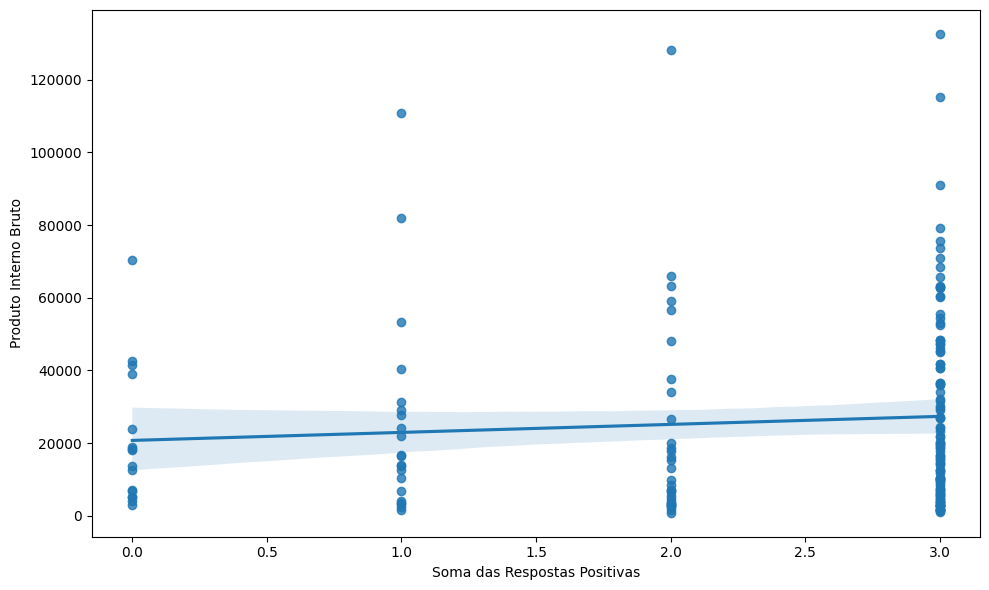

In [119]:
plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x='Soma das Respostas Positivas', y='Produto Interno Bruto')

plt.tight_layout()
plt.show()